# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html  # Get the HTML content from the browser
soup = BeautifulSoup(html, 'html.parser')  # Parse the HTML with BeautifulSoup



In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')  # Locate the table by class name
rows = table.find_all('tr')  # Extract all rows from the table


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []  # Initialize an empty list to store rows of data

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')  # Find all columns in the row
    cols = [col.text.strip() for col in cols]  # Extract text and clean it
    if cols:  # Only add non-empty rows
        data.append(cols)



In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']  # Define column names
mars_weather_df = pd.DataFrame(data, columns=column_names)  # Create the DataFrame



In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()  # Display the first few rows of the DataFrame


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes  # Display the data types of each column



id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_weather_df['id'] = mars_weather_df['id'].astype(str)  # Ensure 'id' is an object (string)
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])  # Convert to datetime
mars_weather_df['sol'] = mars_weather_df['sol'].astype('int32')  # Convert to int32
mars_weather_df['ls'] = mars_weather_df['ls'].astype('int32')  # Convert to int32
mars_weather_df['month'] = mars_weather_df['month'].astype('int32')  # Convert to int32
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype('float64')  # Convert to float64
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype('float64')  # Convert to float64


In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes  # Display the data types of each column to confirm changes



id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = mars_weather_df['month'].nunique()  # Calculate the number of unique months
num_months  # Display the result



12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df['sol'].nunique()  # Calculate the number of unique sols
num_sols  # Display the result



1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()  # Calculate the average min temp per month
avg_min_temp_by_month  # Display the result



month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

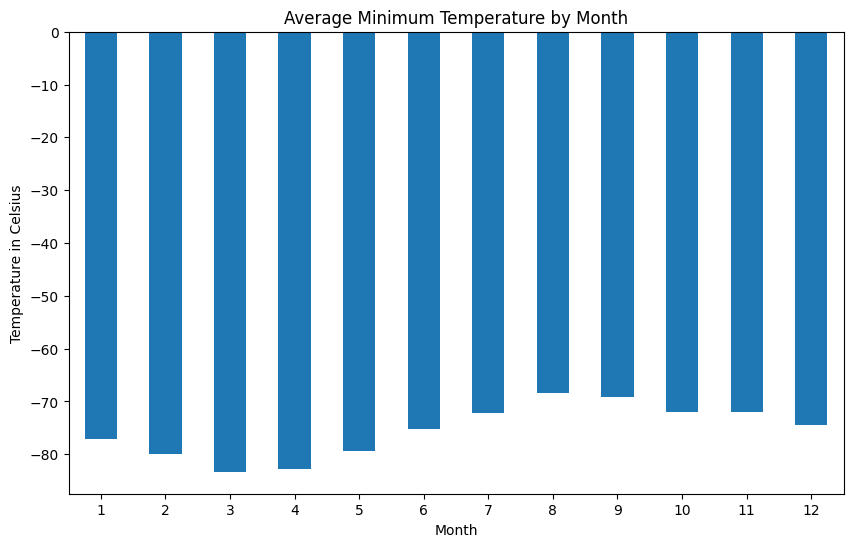

In [15]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Minimum Temperature by Month')  # Add title
plt.xlabel('Month')  # Label the x-axis
plt.ylabel('Temperature in Celsius')  # Label the y-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()  # Display the plot



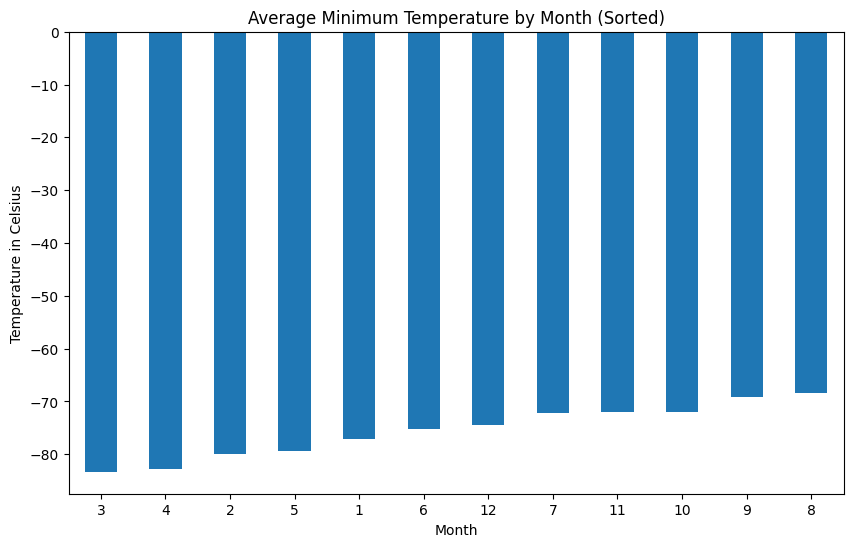

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_avg_temp = avg_min_temp_by_month.sort_values()  # Sort the average temperatures
coldest_month = sorted_avg_temp.idxmin()  # Identify the coldest month
hottest_month = sorted_avg_temp.idxmax()  # Identify the hottest month

# Display the coldest and hottest months
coldest_month, sorted_avg_temp.min(), hottest_month, sorted_avg_temp.max()

# Plot the sorted graph
sorted_avg_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Average Minimum Temperature by Month (Sorted)')  # Add title
plt.xlabel('Month')  # Label the x-axis
plt.ylabel('Temperature in Celsius')  # Label the y-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()  # Display the plot


In [17]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()  # Calculate the average pressure per month
avg_pressure_by_month  # Display the result



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

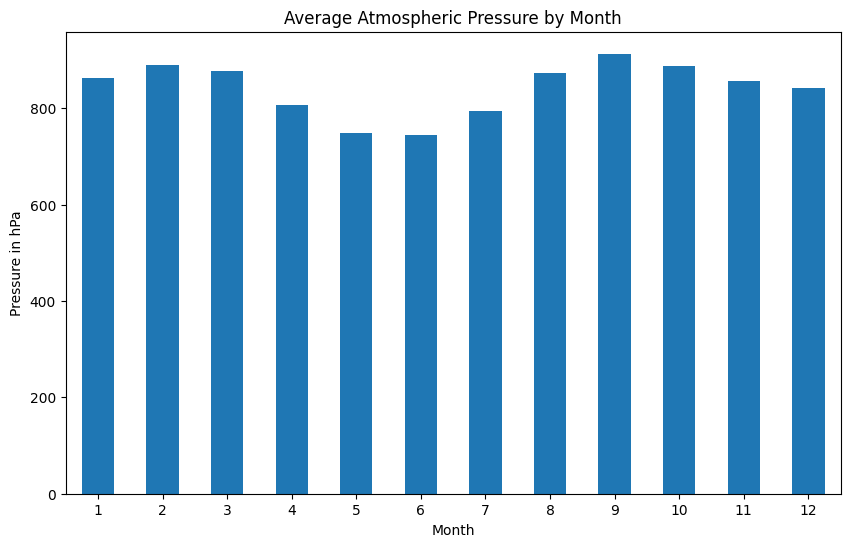

In [18]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', figsize=(10, 6))
plt.title('Average Atmospheric Pressure by Month')  # Add title
plt.xlabel('Month')  # Label the x-axis
plt.ylabel('Pressure in hPa')  # Label the y-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()  # Display the plot


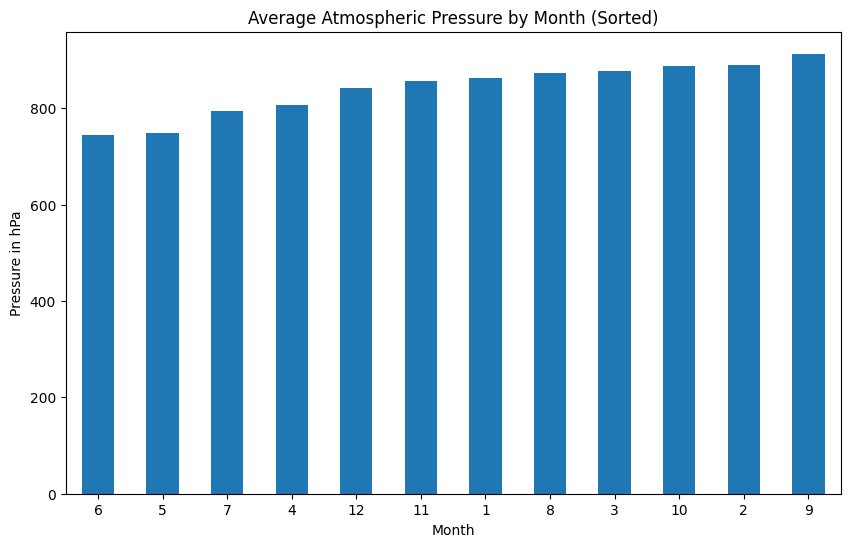

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_pressure = avg_pressure_by_month.sort_values()  # Sort the average pressures
lowest_pressure_month = sorted_avg_pressure.idxmin()  # Identify the month with the lowest pressure
highest_pressure_month = sorted_avg_pressure.idxmax()  # Identify the month with the highest pressure

# Display the lowest and highest pressure months
lowest_pressure_month, sorted_avg_pressure.min(), highest_pressure_month, sorted_avg_pressure.max()

# Plot the sorted graph
sorted_avg_pressure.plot(kind='bar', figsize=(10, 6))
plt.title('Average Atmospheric Pressure by Month (Sorted)')  # Add title
plt.xlabel('Month')  # Label the x-axis
plt.ylabel('Pressure in hPa')  # Label the y-axis
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()  # Display the plot


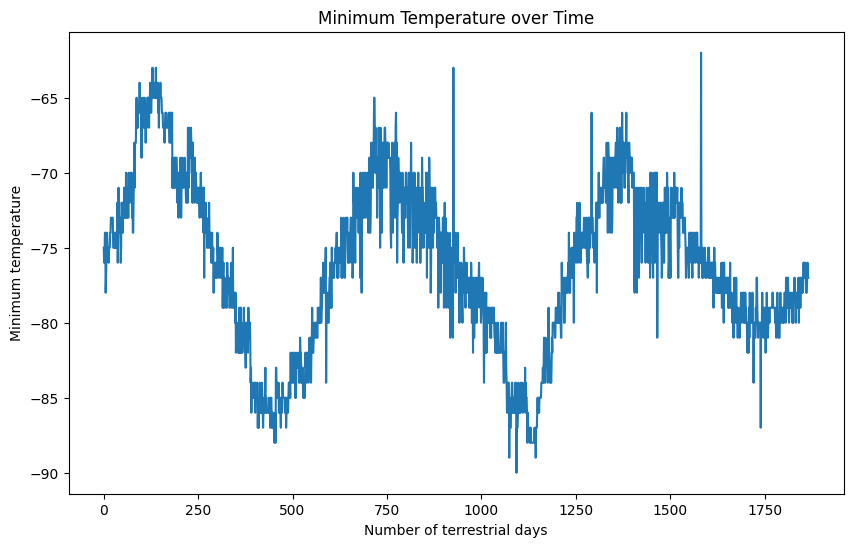

In [21]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

plt.figure(figsize=(10, 6))
plt.plot(mars_weather_df['min_temp'])
plt.title('Minimum Temperature over Time')  # Add title
plt.xlabel('Number of terrestrial days')  # Label the x-axis
plt.ylabel('Minimum temperature')  # Label the y-axis
plt.show()  # Display the plot



#### Minimum Temperature

The coldest temperature was in the 3rd month. Hottest was in the 8th month.

#### Atmospheric Pressure

Lowest atmospheric pressure was in the 6th month. The highest was in the 9th month. 

#### Year Length

There are around 500 days in the Martian year and 12 months. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
import os

# Create an output folder if it doesn't already exist
os.makedirs('output', exist_ok=True)

# Save the DataFrame to a CSV file in the output folder
mars_weather_df.to_csv('output/mars_weather_data.csv', index=False)


In [22]:
browser.quit()